# UAS_KAL
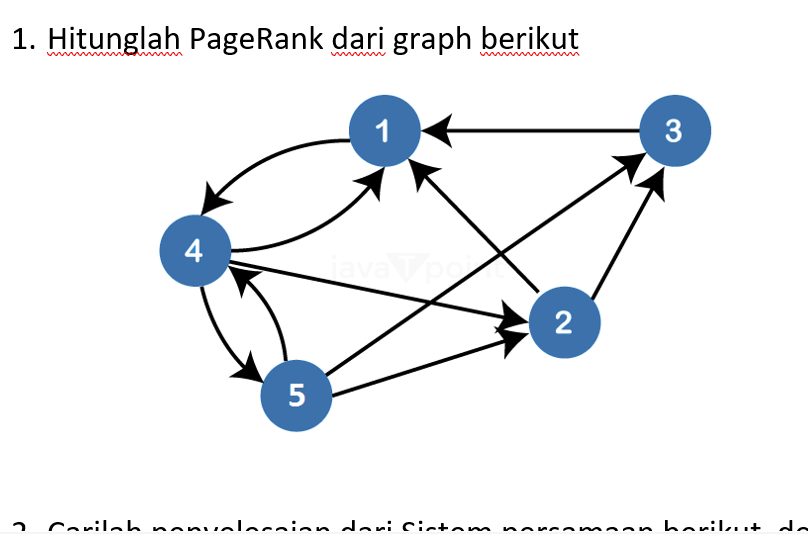

In [1]:
import numpy as np
transition_matrix = np.array([
    [0, 1/2, 1, 0, 0],  # Node 1
    [1/3, 0, 0, 0, 1/2],  # Node 2
    [1/3, 1/2, 0, 0, 0],  # Node 3
    [1/3, 0, 0, 0, 1/2],  # Node 4
    [0, 0, 0, 1, 0]   # Node 5
])

transition_matrix = transition_matrix / transition_matrix.sum(axis=0)
damping_factor = 0.85
n = transition_matrix.shape[0]
pagerank = np.ones(n) / n
teleport = np.ones(n) / n

def compute_pagerank(transition_matrix, damping_factor, pagerank, teleport, max_iterations=100, tolerance=1e-6):
    for _ in range(max_iterations):
        new_pagerank = damping_factor * transition_matrix @ pagerank + (1 - damping_factor) * teleport
        if np.linalg.norm(new_pagerank - pagerank) < tolerance:
            break
        pagerank = new_pagerank
    return pagerank

pagerank = compute_pagerank(transition_matrix, damping_factor, pagerank, teleport)

pagerank


array([0.26345086, 0.18378799, 0.18275399, 0.18378799, 0.18621917])

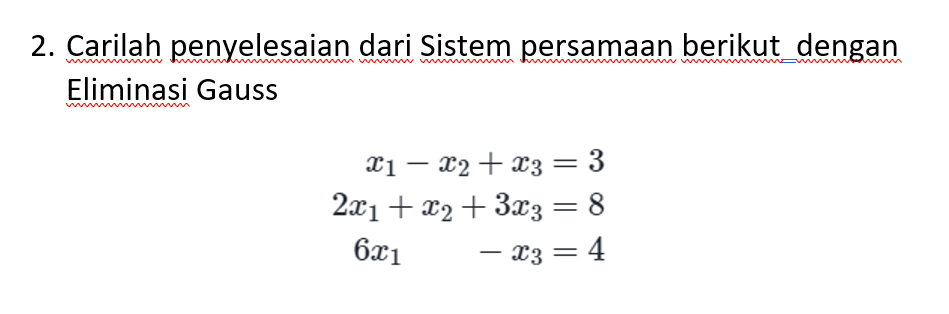

In [2]:
import numpy as np

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

In [3]:
import numpy as np

def RowSwap(A, k, l):
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A, k, scale):
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A, k, l, scale):
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j] * scale

    return B

# Initialize the augmented matrix
A = np.array([
    [1, -1, 1, 3],
    [2, 1, 3, 8],
    [6, 0, -1, 4]
], dtype=float)


In [4]:
A = np.array([
    [1, -1, 1, 3],
    [2, 1, 3, 8],
    [6, 0, -1, 4]
], dtype=float)

A = RowScale(A, 0, 1/A[0,0])
print(A)

[[ 1. -1.  1.  3.]
 [ 2.  1.  3.  8.]
 [ 6.  0. -1.  4.]]


In [5]:
A = RowAdd(A, 0, 1, -A[1,0])
print(A)

[[ 1. -1.  1.  3.]
 [ 0.  3.  1.  2.]
 [ 6.  0. -1.  4.]]


In [6]:
A = RowAdd(A, 0, 2, -A[2,0])
print(A)

[[  1.  -1.   1.   3.]
 [  0.   3.   1.   2.]
 [  0.   6.  -7. -14.]]


In [7]:
A = RowScale(A, 1, 1/A[1,1])
print(A)

[[  1.          -1.           1.           3.        ]
 [  0.           1.           0.33333333   0.66666667]
 [  0.           6.          -7.         -14.        ]]


In [8]:
A = RowAdd(A, 1, 2, -A[2,1])
print(A)

[[  1.          -1.           1.           3.        ]
 [  0.           1.           0.33333333   0.66666667]
 [  0.           0.          -9.         -18.        ]]


In [9]:
A = RowScale(A, 2, 1/A[2,2])
print(A)

[[ 1.         -1.          1.          3.        ]
 [ 0.          1.          0.33333333  0.66666667]
 [-0.         -0.          1.          2.        ]]


In [10]:
A = RowAdd(A, 2, 1, -A[1,2])
print(A)

[[ 1. -1.  1.  3.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]]


In [11]:
A = RowAdd(A, 2, 0, -A[0,2])
print(A)

[[ 1. -1.  0.  1.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]]


In [12]:
A = RowAdd(A, 1, 0, -A[0,1])
print(A)

[[ 1.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]]


In [13]:
#solusi
x1 = A[0, 3]
x2 = A[1, 3]
x3 = A[2, 3]

x1, x2, x3

(1.0, 0.0, 2.0)